In [1]:
#Exploration of New product - September 2021
#Section with PCs and with Levels
import datetime as dt 
import glob
import netCDF4 as nc
import numpy as np
import os

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import time
import gsw

import yaml


In [2]:
with open(r'configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])

File version:  0.1


In [ ]:
%%time

pathMon = '/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/'

year = "1993"
file = []

mm = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"];

for yy in np.arange(2010, 2020):
    for mms in mm:
         file = glob.glob(f"/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/produit_{yy}{mms}.nc")

         ds = xr.open_mfdataset(file)
         ds_selection = ds.sel(lon=(-18.875), lat=(69.12), method='nearest')
         ds_selection.to_netcdf(f'/home1/datahome/mlejeune/assets/test/produit_{mms}_{yy}.nc')


## Glorys12

In [ ]:
%%time

dir_path = '/home/ref-ocean-reanalysis/global-reanalysis-phy-001-030-daily'
file = []

yy = "1993"
mm = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"];

for yy in range(2003, 2011):
    
    start_time = time.time()

    for mms in mm:
        file = glob.glob(f"{dir_path}/{yy}/{mms}/*_mean_{yy}*.nc")
    
        for files in file:
            day = str(files[106: 108])

            ds_full = xr.open_mfdataset(files)

            glorys_sel = ds_full.sel(longitude=(-18.875), latitude=(69.12), method='nearest')
            #glorys_sel = ds_full.sel(depth=ds_full['depth'][0])
            # glorys_sel = glorys_sel.sel(dict(longitude=cora_sel['LONGITUDE'], latitude=cora_sel['LATITUDE'], time=cora_sel['TIME']), method='nearest')
            glorys_sel.to_netcdf(f'/home1/datahome/mlejeune/assets/Glorys_sel/GLORYS_{yy}{mms}{day}.nc')
    
        print(f"year {yy} {mms} finished in {time.time() - start_time}")


year 2003 01 finished in 74.5133945941925
year 2003 02 finished in 141.15339589118958
year 2003 03 finished in 216.63743805885315
year 2003 04 finished in 288.589417219162
year 2003 05 finished in 363.3853826522827
year 2003 06 finished in 435.0053873062134
year 2003 07 finished in 511.31741189956665
year 2003 08 finished in 589.077398777008
year 2003 09 finished in 666.3373906612396
year 2003 10 finished in 745.4933879375458
year 2003 11 finished in 820.5693848133087
year 2003 12 finished in 895.4373917579651
year 2004 01 finished in 72.61191725730896
year 2004 02 finished in 147.22392177581787
year 2004 03 finished in 230.4919195175171
year 2004 04 finished in 302.1479229927063
year 2004 05 finished in 378.4199159145355
year 2004 06 finished in 458.60391902923584
year 2004 07 finished in 534.6239354610443
year 2004 08 finished in 611.2159152030945
year 2004 09 finished in 684.8959119319916
year 2004 10 finished in 762.3959074020386
year 2004 11 finished in 837.5119125843048
year 2004

In [5]:
ds_selection_glorys = ty.sel(longitude=(-18.875), latitude=(69.12), method='nearest')


In [6]:
ds_full_prediteced = ds_full.sel(DEPTH=0)
ds_glorys_surface = ds_selection_glorys.sel(depth=ds_selection_glorys['depth'][0])

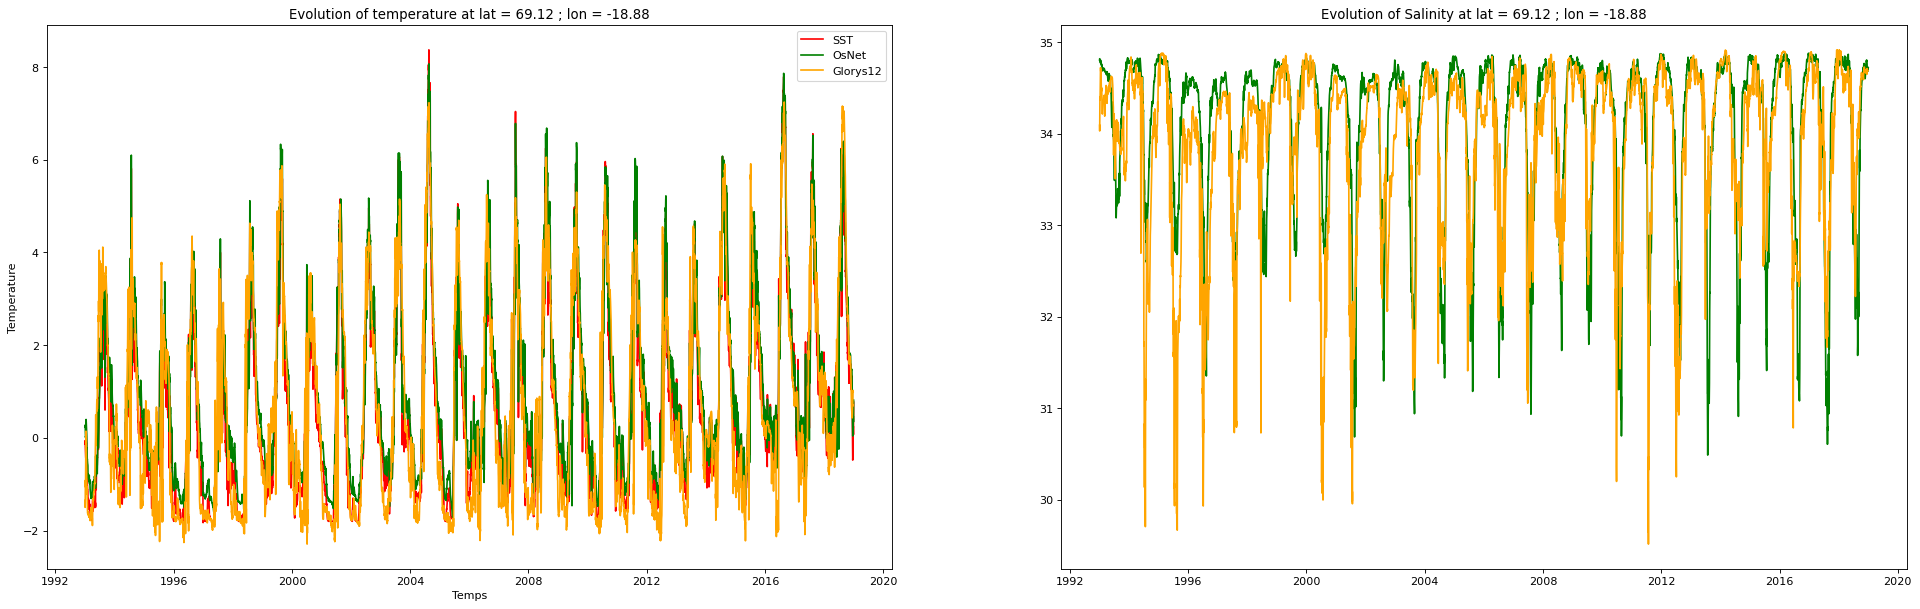

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9), dpi=80, facecolor='w', edgecolor='k')

ax[0].set_title("Evolution of temperature at lat = 69.12 ; lon = -18.88")
ax[0].plot(ds_full['time'], ds_full['SST'], label='SST',c = 'red')
ax[0].plot(ds_full_prediteced['time'], ds_full_prediteced['TEMP_predicted'], label='OsNet',c = 'green')
ax[0].plot(ds_glorys_surface['time'], ds_glorys_surface['thetao'], label='Glorys12',c = 'orange')

ax[1].set_title("Evolution of Salinity at lat = 69.12 ; lon = -18.88")
ax[1].plot(ds_full_prediteced['time'], ds_full_prediteced['PSAL_predicted'], label='OsNet',c = 'green')
ax[1].plot(ds_glorys_surface['time'], ds_glorys_surface['so'], label='Glorys12',c = 'orange')

plt.setp(ax[0], xlabel='Temps')
plt.setp(ax[0], ylabel='Temperature')

leg = ax[0].legend();

plt.show()

## Plot moyenne 

In [3]:
start_year = 2002;
end_year = 2007;
mm = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"];

for yy in np.arange(start_year, (end_year + 1)):
    for mms in mm: 
        ds_to_mounths_glorys = xr.open_mfdataset(f"/home1/datahome/mlejeune/assets/Glorys_sel/GLORYS_{yy}{mms}*.nc")
        ds_to_mounths_glorys.to_netcdf(f'/home1/datahome/mlejeune/assets/Glorys_sel/mounths/produit_{mms}_{yy}.nc')



In [4]:
#Glorys12

ds_full = xr.open_mfdataset(f"/home1/datahome/mlejeune/assets/Glorys_sel/mounths/produit*.nc")
ds_full.sortby('time')
ds_full = ds_full.sel(depth=ds_full['depth'][0])
ds_full

<xarray.Dataset>
Dimensions:    (time: 5478)
Coordinates:
    longitude  float32 -18.83
    latitude   float32 69.08
    depth      float32 0.494
  * time       (time) datetime64[ns] 1993-01-01T12:00:00 ... 2007-12-31T12:00:00
Data variables:
    mlotst     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    zos        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    bottomT    (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    sithick    (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    siconc     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    usi        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    vsi        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    thetao     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    so         (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    uo         (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    vo         (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2017/04/06 14:05:19 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR GLORYS12V1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [22]:
#SST & OsNet

ds_full = xr.open_mfdataset(f"/home1/datahome/mlejeune/assets/test/produit*.nc")
ds_full.sortby('time')
ds_full = ds_full.sel(DEPTH=0)


In [27]:
start_year = 1993;
end_year = 2002;

current_year = start_year;

global_array = []

for yy in np.arange(start_year, (end_year + 1)):
    current_year = current_year + 1;
    
    tempo_array = []
    tempo_array_osnet = []
    
    
    ds_full_year = ds_full.where(ds_full.time.dt.year>=current_year , drop = True)
    ds_full_year = ds_full.where(ds_full.time.dt.year==yy , drop = True)
    
    ds_full_year.sortby('time')

    #Data from SST
    data = ds_full_year['SST']
    
    #Data from OsNet
    #data = ds_full_year['TEMP_predicted']
    
    #Data from Glorys12
    #data = ds_full_year['thetao']
    
    
    for tt in range(len(data)):
        datatempo_selec = data.compute()[tt]
        tempo_array.append(datatempo_selec.item())
    
    global_array.append(tempo_array)
    
print(len(global_array))


10


In [28]:
tempo_list_sum = []

#init tempo list
for datas_init in range(len(global_array[0])):
    tempoo = []
    tempoo.append(global_array[0][datas_init])
    
    tempo_list_sum.append(tempoo)
   
global_array.pop(0)

for yy in range(len(global_array)):
    for datas in range(365): #len(global_array[yy])
        tempo_list_sum[datas].append(global_array[yy][datas])


In [29]:
final_list = []

for yy in range(len(tempo_list_sum)):
    data_current = []
    data_current = [x for x in tempo_list_sum[yy] if math.isnan(x) == False]
    
    moyenne = 0
    summ = 0
    
    summ = sum(data_current)        
    moyenne = summ / len(data_current)
    
    final_list.append(moyenne)


In [26]:
final_list_osNet = final_list

In [21]:
final_list_glorys12 = final_list

In [30]:
final_list_SST = final_list

### Salinity

In [7]:
final_list_OsNet_Salinity = final_list

In [15]:
final_list_Glorys12_Salinity = final_list

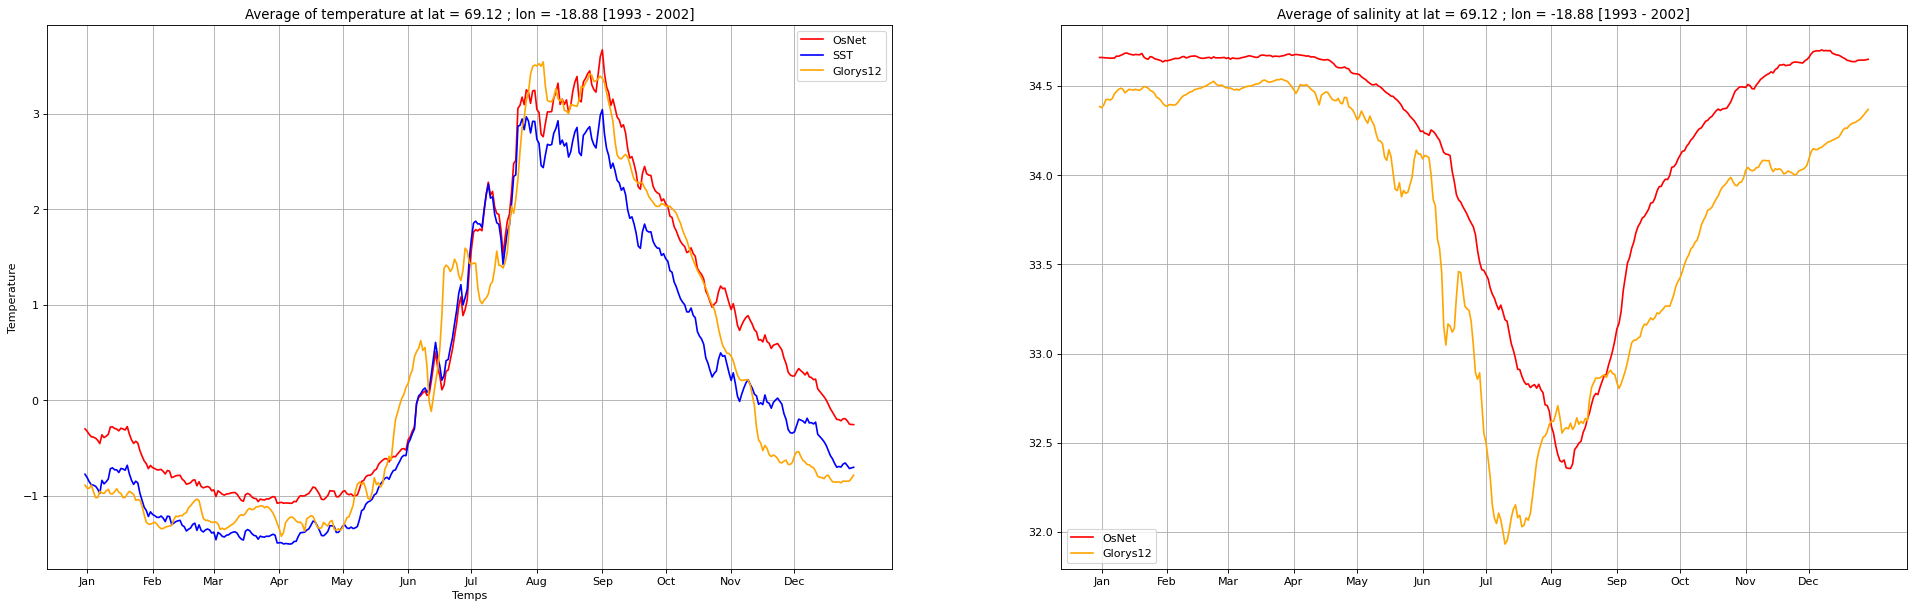

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9), dpi=80, facecolor='w', edgecolor='k')

ax[0].set_title("Average of temperature at lat = 69.12 ; lon = -18.88 [1993 - 2002]")
ax[0].plot(np.arange(365), final_list_osNet, label='OsNet',c = 'red')
ax[0].plot(np.arange(365), final_list_SST, label='SST',c = 'blue')
ax[0].plot(np.arange(365), final_list_glorys12, label='Glorys12',c = 'orange')

ax[1].set_title("Average of salinity at lat = 69.12 ; lon = -18.88 [1993 - 2002]")
ax[1].plot(np.arange(365), final_list_OsNet_Salinity, label='OsNet',c = 'red')
ax[1].plot(np.arange(365), final_list_Glorys12_Salinity, label='Glorys12',c = 'orange')

plt.setp(ax[0], xlabel='Temps')
plt.setp(ax[0], ylabel='Temperature')

month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax[0].set_xticks(month_starts)
ax[0].set_xticklabels(month_names)

ax[1].set_xticks(month_starts)
ax[1].set_xticklabels(month_names)

leg = ax[0].legend();
leg = ax[1].legend();

ax[0].grid()
ax[1].grid()
plt.show()